<h3><center><font color='green'>Un notebook de simulation pour déterminer la fréquence nécessaire de mise à jour du modèle de segmentation.</font></center></h3>

                                             ----------------------------    

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans

- Dans le but d'établir un contrat de maintenance de l'algorithme de segmentation client, nous devons tester sa stabilité dans le temps et voir, par exemple, à quel moment les clients changent de Cluster.

- Pour cela, nous devons recalculer toutes les features en fonction d'une période donnée. 

In [2]:
import ext_scripts.olist_functions as fct 
fct.make_dataset(dpath="./archive/")

tion du dataset en cours ...
______________________________________________________
Features complétées avec la valeur la plus fréquente :
______________________________________________________
mean_payment_sequential 	 1.0
mean_payment_installments 	 1.0
mean_review_score 	 5.0
mean_delivery_days 	 7.0
______________________________________________________
Durée d'execution du Feature engineering : 21.84s


,nb_orders,total_items,total_spend,mean_payment_sequential,mean_payment_installments,mean_review_score,mean_delivery_days,books_cds_media,fashion_clothing_accessories,flowers_gifts,...,health_beauty,home_furniture,other,sport,technology,toys_baby,favorite_sale_month,order_mean_delay,freight_ratio,haversine_distance
customer_unique_id,,,,,,,,,,,,,,,,,,,,,
0000f46a3911fa3c0805444483337064,1,1,86.22,1.0,8.0,3.0,26.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0,3,239.0,0.20,125.363853
0000f6ccb0745a6a4b88665a16c9f078,1,1,43.62,1.0,4.0,4.0,20.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0,10,23.0,0.40,1574.231129
0005e1862207bf6ccc02e4228effd9a0,1,1,150.12,1.0,3.0,4.0,4.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,3,245.0,0.10,428.916514
0006fdc98a402fceb4eb0ee528f6a8d4,1,1,29.00,1.0,2.0,3.0,16.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0,7,109.0,0.52,669.215559
000a5ad9c4601d2bbdd9ed765d5213b3,1,1,91.28,1.0,3.0,4.0,11.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0,8,85.0,0.16,337.899660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fff699c184bcc967d62fa2c6171765f7,1,1,55.00,1.0,1.0,4.0,12.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0,9,64.0,0.27,209.713834
fffa431dd3fcdefea4b1777d114144f2,1,1,81.20,1.0,1.0,5.0,11.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0,10,5.0,0.20,428.916514
fffcf5a5ff07b0908bd4e2dbc735a684,1,2,2067.42,1.0,10.0,5.0,14.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0,6,149.0,0.24,1486.897041


In [3]:
categories_col = ['books_cds_media',
                  'fashion_clothing_accessories',
                  'flowers_gifts',
                  'groceries_food_drink',
                  'health_beauty',
                  'home_furniture',
                  'other',
                  'sport',
                  'technology',
                  'toys_baby']

In [4]:
# Initial period of 12 months
data_init = fct.make_dataset(dpath="./archive/", initial=True, period=2)

tion du dataset en cours ...
______________________________________________________
Features complétées avec la valeur la plus fréquente :
______________________________________________________
mean_payment_sequential 	 1.0
mean_payment_installments 	 1.0
mean_review_score 	 5.0
mean_delivery_days 	 7.0
______________________________________________________
Durée d'execution du Feature engineering : 20.72s


In [5]:
data_init.columns

Index(['nb_orders', 'total_items', 'total_spend', 'mean_payment_sequential',
       'mean_payment_installments', 'mean_review_score', 'mean_delivery_days',
       'books_cds_media', 'fashion_clothing_accessories', 'flowers_gifts',
       'groceries_food_drink', 'health_beauty', 'home_furniture', 'other',
       'sport', 'technology', 'toys_baby', 'favorite_sale_month',
       'order_mean_delay', 'freight_ratio', 'haversine_distance'],
      dtype='object')

In [6]:
# Remove categories
data_init.drop(categories_col, axis=1, inplace=True)
data_init.head(3)

,nb_orders,total_items,total_spend,mean_payment_sequential,mean_payment_installments,mean_review_score,mean_delivery_days,favorite_sale_month,order_mean_delay,freight_ratio,haversine_distance
customer_unique_id,,,,,,,,,,,
0000f46a3911fa3c0805444483337064,1,1,86.22,1.0,8.0,3.0,26.0,3,178.0,0.20,125.363853
0005e1862207bf6ccc02e4228effd9a0,1,1,150.12,1.0,3.0,4.0,4.0,3,184.0,0.10,428.916514
0006fdc98a402fceb4eb0ee528f6a8d4,1,1,29.00,1.0,2.0,3.0,16.0,7,48.0,0.52,669.215559


 la période totale à couvrir :

In [7]:
olist_path = "./archive/"
orders = pd.read_csv(olist_path+"olist_orders_dataset.csv")
orders = orders.loc[orders.order_status == "delivered", 
                    "order_purchase_timestamp"]
orders = pd.to_datetime(orders)
time_delta = int((orders.max() - orders.min())/np.timedelta64(1,'M'))
print("La période complète des commandes porte sur {} mois.".format(time_delta))

La période complète des commandes porte sur 23 mois.


Pour déterminer le moment où les clients changent de cluster, nous allons itérer le K-Means sur toute la période avec des deltas de 2 mois et calculer le score ARI, en prenant garde à bien comparer les mêmes clients (ceux des 12 mois initiaux).

Ici le déroulé est créé directement dans le notebook pour explication, en production, toutes ses opérations seront regroupées dans une classe Python pour automatiser le processus.

In [8]:
# Kmeans on initial period
kmeans_init = Pipeline([("preprocessor", MinMaxScaler()),
                        ("kmeans", KMeans(7, random_state=42))])
kmeans_init.fit(data_init)
init_labels = kmeans_init.named_steps['kmeans'].labels_

In [9]:
from sklearn.metrics.cluster import adjusted_rand_score

In [10]:
ari_score = []
for p in np.arange(2,(time_delta-12),2):
    # Create dataset for period
    data_period = fct.make_dataset(dpath="./archive/", 
                                   initial=False, 
                                   period=p)
    data_period.drop(categories_col, axis=1, inplace=True)
    
    # Filter on initial customer client
    data_period = data_period[data_period.index.isin(data_init.index)]
    
    # K-Means
    kmeans_p = Pipeline([("preprocessor", MinMaxScaler()),
                         ("kmeans", KMeans(7, random_state=42))])
    kmeans_p.fit(data_period)
    p_labels = kmeans_p.named_steps['kmeans'].labels_
    
    # Calculate ARI score
    ari_p = adjusted_rand_score(init_labels, kmeans_p[1].labels_)
    ari_score.append([p,ari_p])

tion du dataset en cours ...
______________________________________________________
Features complétées avec la valeur la plus fréquente :
______________________________________________________
mean_payment_sequential 	 1.0
mean_payment_installments 	 1.0
mean_review_score 	 5.0
mean_delivery_days 	 7.0
______________________________________________________
Durée d'execution du Feature engineering : 26.50s
tion du dataset en cours ...
______________________________________________________
Features complétées avec la valeur la plus fréquente :
______________________________________________________
mean_payment_sequential 	 1.0
mean_payment_installments 	 1.0
mean_review_score 	 5.0
mean_delivery_days 	 8.0
______________________________________________________
Durée d'execution du Feature engineering : 37.06s
tion du dataset en cours ...
______________________________________________________
Features complétées avec la valeur la plus fréquente :
_________________________________________

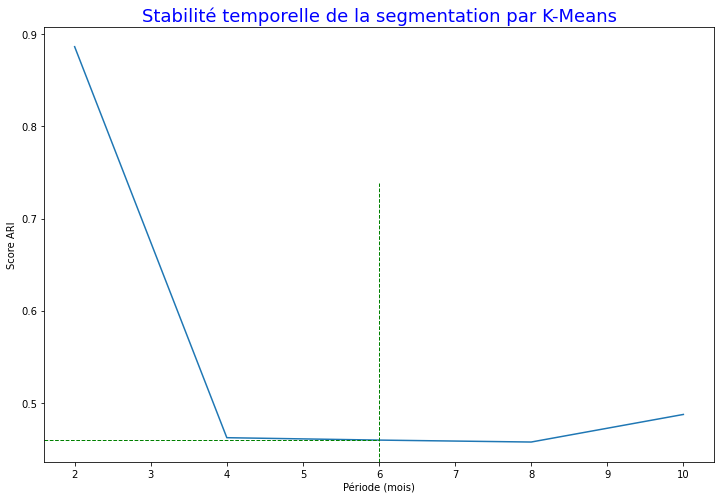

In [11]:
ari_score = pd.DataFrame(ari_score, columns=["periode", "ARI"])

# plot ARI Score
fig = plt.figure(figsize=(12,8))
sns.lineplot(data=ari_score, x="periode", y="ARI")
plt.axhline(y=ari_score.iloc[2][1], linestyle="--", 
            color="green",
            xmax=0.5,
            linewidth=1)
plt.axvline(x=ari_score.iloc[2][0], linestyle="--", 
            color="green",
            ymax=1.1-(ari_score.iloc[2][1]),
            linewidth=1)
plt.xlabel("Période (mois)")
plt.ylabel("Score ARI")
plt.title("Stabilité temporelle de la segmentation par K-Means",
          fontsize=18,
          color="b")
plt.show()

#### Sur ce plot des scores ARI obtenus sur les itérations par période de 2 mois, on remarque une forte inflexion après 4 mois sur les clients initiaux.

Il faudra donc prévoir la maintenance du programme de segmentation tous les 6 mois (d'aprés le diagramme) dans un premier temps puis re-tester cette stabilité temporelle au fil du temps afin de l'affiner. Il sera donc nécessaire de redéfinir les segments clients à chaque maintenance.